# Synthetic Population (GREGWT)

UN Environment

In [1]:
import datetime; print(datetime.datetime.now())

2017-08-10 14:40:06.254256


In [2]:
import pandas as pd
%matplotlib inline

In [3]:
from urbanmetabolism.population.model import plot_error

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
pop = 32694 #households
ind = 154678 #individuals
year = 2010

In [5]:
trace = pd.read_csv(
    'data/survey_Sorsogon_Electricity_Water_100000.csv', index_col=0)
census = pd.read_csv('data/benchmarks.csv', index_col=0)
#fit_cols = ['Income', 'Electricity','Water']
#skip_cols = ['w', 'wf', 'level_0', 'index']

In [6]:
def identify(var, sufix='e_'):
    cen_TV = census.loc[year ,[c for c in census.columns if var in c]]
    ces_val = cen_TV.div(cen_TV.sum())[var+'_yes']
    print('OK')
    try:
        new_TV = trace.loc[:,sufix+var].astype('category')
        trace_val = new_TV.value_counts()[1] / new_TV.shape[0]
    except:
        trace_val = np.nan
    print('census val = {:0.2f} \t trace value = {:0.2f}'.format(ces_val, trace_val))

In [7]:
identify('AC')

OK
census val = 0.10 	 trace value = 0.10


In [8]:
identify('Cooking')

OK
census val = 0.01 	 trace value = 0.01


In [9]:
identify('Lighting')

OK
census val = 0.92 	 trace value = 0.92


In [10]:
identify('Refrigeration')

OK
census val = 0.34 	 trace value = 0.34


In [11]:
identify('TV')

OK
census val = 0.72 	 trace value = 0.72


In [12]:
cen_urban = census.loc[year, [c for c in census.columns if 'Urbanity' in c]]
cen_urban = cen_urban.div(cen_urban.sum())#['Urbanity_Urban']
new_Urban = trace.loc[:,'e_Urban'].astype('category')
trace_val = new_Urban.value_counts()[1] / new_Urban.shape[0]

In [13]:
cen_urban

Urbanity_Rural    0.527052
Urbanity_Urban    0.472948
Name: 2010, dtype: float64

In [14]:
new_Urban.value_counts() /  new_Urban.shape[0]

Urbanity_Urban    0.521254
Urbanity_Rural    0.478746
Name: e_Urban, dtype: float64

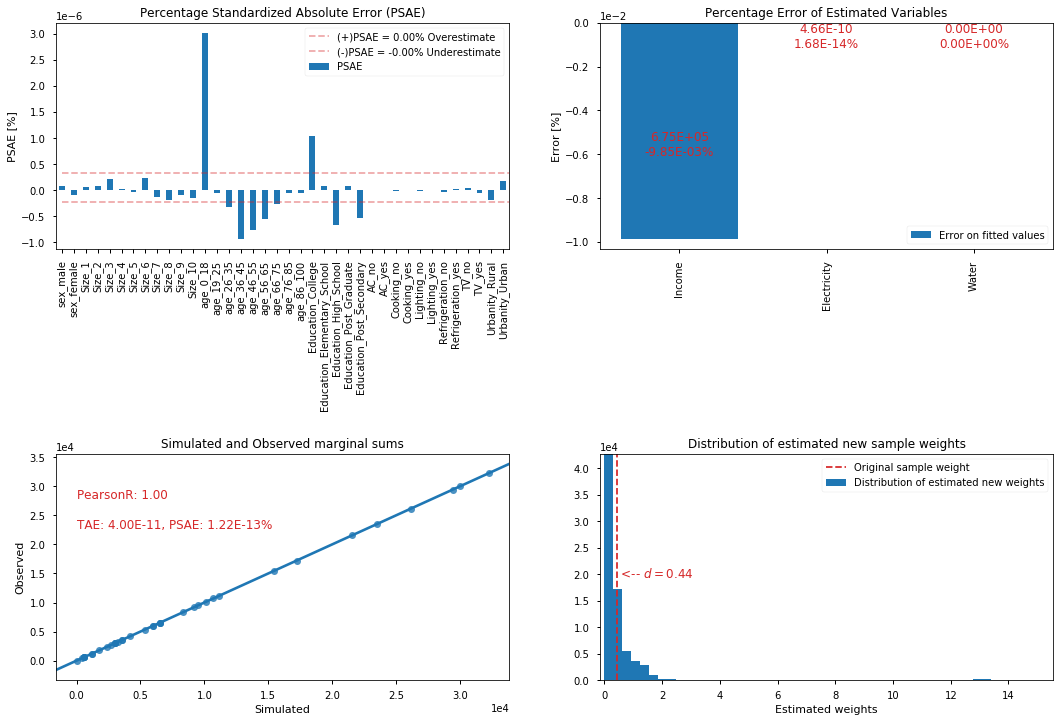

In [15]:
REC = plot_error(trace, census, 
                 #skip_cols, fit_cols, 
                 pop = pop, save_all=False)